# TP 1
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [ ]:
%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [29]:
def to_chromatic_coordinates(img):
    sum_of_ch = np.zeros((img.shape[0],img.shape[1],1), dtype = int)
    img = np.uint(img)
    sum_of_ch = img[:,:,0] + img[:,:,1] + img[:,:,2]
    
    #reemplazo los ceros por el valor 1, para poder dividir cada canal sin error
    a = np.any(sum_of_ch == 0)
    if (a == True):
        sum_of_ch = np.where(sum_of_ch==0, 1, sum_of_ch)
    
    #saturo los máximos a 255
    sum_of_ch = np.where(sum_of_ch > 255, 255, sum_of_ch)
    
    img_modif = np.stack([(img[:,:,0]/sum_of_ch), (img[:,:,1]/sum_of_ch), (img[:,:,2]/sum_of_ch)],axis=2)    
    return img_modif


def white_patch(img): 
    #calculo el máximo de cada canal. Si éste es igual a cero, lo reemplazo por el valor 1
    if(np.max(img[:,:,0]) != 0):
        ch_R_max = np.max(img[:,:,0])
    else:
        ch_R_max = 1
        
    if(np.max(img[:,:,1]) != 0):
        ch_G_max = np.max(img[:,:,1])
    else:
        ch_G_max = 1
        
    if(np.max(img[:,:,2]) != 0):
        ch_B_max = np.max(img[:,:,2])
    else:
        ch_B_max = 1    
        
    ch_R_norm_factor = 255/ch_R_max
    ch_G_norm_factor = 255/ch_G_max
    ch_B_norm_factor = 255/ch_B_max
    
    img = np.float64(img)
    
    ch_R_norm = ch_R_norm_factor * img[:,:,0]
    ch_G_norm = ch_G_norm_factor * img[:,:,1]
    ch_B_norm = ch_B_norm_factor * img[:,:,2]
    
    img_modif = np.uint8(np.stack([ch_R_norm, ch_G_norm, ch_B_norm],axis=2))

    return img_modif

In [ ]:
## Pasaje a coordenadas cromáticas: 
Análisis de imágenes con diferente contraste

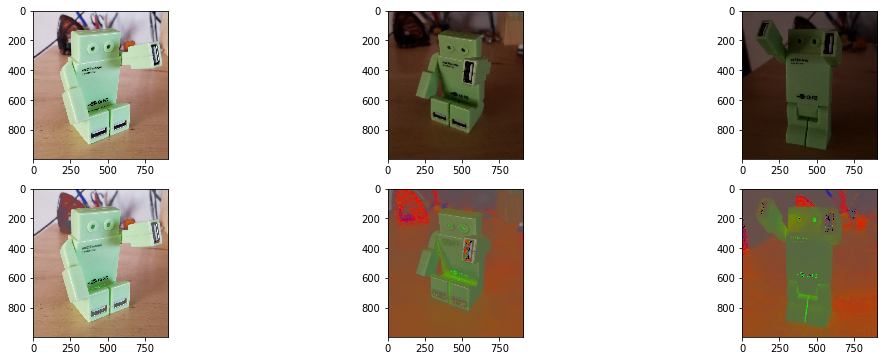

In [38]:
# Carga de imagenes
imgBGR_1 = cv.imread('CoordCrom_1.png',cv.IMREAD_COLOR)
imgRGB_1 = cv.cvtColor(imgBGR_1,cv.COLOR_BGR2RGB)

imgBGR_2 = cv.imread('CoordCrom_2.png',cv.IMREAD_COLOR)
imgRGB_2 = cv.cvtColor(imgBGR_2,cv.COLOR_BGR2RGB)

imgBGR_3 = cv.imread('CoordCrom_3.png',cv.IMREAD_COLOR)
imgRGB_3 = cv.cvtColor(imgBGR_3,cv.COLOR_BGR2RGB)    

# Pasaje a coordenadas cromáticas
imgRGB_modif_1 = to_chromatic_coordinates(imgRGB_1)
imgRGB_modif_2 = to_chromatic_coordinates(imgRGB_2)
imgRGB_modif_3 = to_chromatic_coordinates(imgRGB_3)

# Comparación de imagen original vs imagen procesada
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(18,6))

ax[0][0].imshow(imgRGB_1)
ax[1][0].imshow(imgRGB_modif_1)

ax[0][1].imshow(imgRGB_2)
ax[1][1].imshow(imgRGB_modif_2)

ax[0][2].imshow(imgRGB_3)
ax[1][2].imshow(imgRGB_modif_3)

plt.show()
fig.savefig('chromantic_coordinates.png')

## White Patch: 
Análisis de imágenes con diferente iluminación

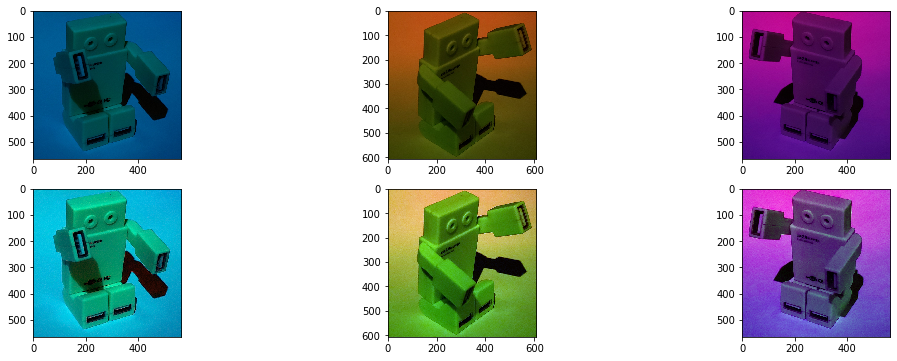

In [37]:
# Carga de imagenes
imgBGR_B = cv.imread('WP_B.png',cv.IMREAD_COLOR)
imgRGB_B = cv.cvtColor(imgBGR_B,cv.COLOR_BGR2RGB)

imgBGR_O = cv.imread('WP_O.png',cv.IMREAD_COLOR)
imgRGB_O = cv.cvtColor(imgBGR_O,cv.COLOR_BGR2RGB)

imgBGR_R = cv.imread('WP_R.png',cv.IMREAD_COLOR)
imgRGB_R = cv.cvtColor(imgBGR_R,cv.COLOR_BGR2RGB)    

# Pasaje a coordenadas cromáticas
imgRGB_modif_B = white_patch(imgRGB_B)
imgRGB_modif_O = white_patch(imgRGB_O)
imgRGB_modif_R = white_patch(imgRGB_R)

# Comparación de imagen original vs imagen procesada
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(18,6))

ax[0][0].imshow(imgRGB_B)
ax[1][0].imshow(imgRGB_modif_B)

ax[0][1].imshow(imgRGB_O)
ax[1][1].imshow(imgRGB_modif_O)

ax[0][2].imshow(imgRGB_R)
ax[1][2].imshow(imgRGB_modif_R)

plt.show()
fig.savefig('white_patch.png')    